#      ****     SENTIMENT ANALYSIS OF TWEETS       ****

In [2]:
import re
import csv
import string
import numpy as np
import pandas as pd
from wordcloud import WordCloud 
from matplotlib import pyplot as plt
from porter_stemmer import PorterStemmer
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction import stop_words
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS


### Data Reading

In [3]:
data = pd.read_csv("./input_data/final_data.csv")
data.head(10)

,text,target
0,awww bummer shoulda got david carr dai,0
1,upset updat facebook tex result school todai b...,0
2,dive time ball manag save rest bound,0
3,bodi feel itchi like,0
4,behav mad,0
5,crew,0
6,need hug,0
7,hei long time ye rain bit bit lol fine thank,0
8,nope did,0
9,que muera,0


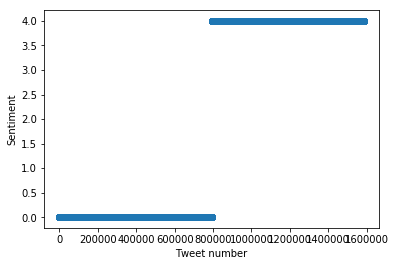

In [4]:
y = data['target']
x = range(len(data))
plt.scatter(x,y)
plt.xlabel("Tweet number")
plt.ylabel("Sentiment")
plt.plot()
plt.show()

### Train-Test-Validation Split

In [7]:
X = data['text']
Y = data['target']
X_train_val, X_test , Y_train_val, Y_test = train_test_split(X,Y,test_size=0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val,Y_train_val,test_size=0.25)



In [8]:
train_df = pd.concat([X_train, Y_train],axis='columns').reset_index(drop=True)
train_df.to_csv("./input_data/train_df.csv", sep=',')         

validation_df = pd.concat([X_val, Y_val],axis='columns').reset_index(drop=True)
validation_df.to_csv("./input_data/validation_df.csv", sep=',')

test_df = pd.concat([X_test, Y_test],axis='columns').reset_index(drop=True)
test_df.to_csv("./input_data/test_df.csv", sep=',')

### Reading Of Data From Stored File

In [9]:
train_df = pd.read_csv("./input_data/train_df.csv")
X_train = train_df['text'][:100000]
Y_train = train_df['target'][:100000]


val_df = pd.read_csv("./input_data/validation_df.csv")
X_val = val_df['text'][:1000]
Y_val = val_df['target'][:1000]

### Bag Of Words

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
VC_train = vectorizer.fit_transform(X_train.values.astype('U'))


VC_val = vectorizer.transform(X_val.values.astype('U'))
print(VC_val.todense().shape)

(1000, 41847)


### Model Fitting

In [11]:

gnb = GaussianNB()

i = 0
while i < len(X_train):
    model_nb = gnb.partial_fit(VC_train[i:i+1000].todense(), Y_train[i:i+1000],classes=[0,4])
    i += 1000


# PREDICTION

count = 0
pred = model_nb.predict(VC_val.todense())
for i in range(len(pred)):
    if pred[i] == Y_val[i]:
        count += 1
        
acc = (count*1.0)/len(pred)
print(acc)

0.553
